### 이상치 제거

#### Skewness(왜도)
- 분포의 정규분포와 비교하여 비대칭성 정도를 나타내는 척도이다.
- 양의 값을 가지면 (Positive Skewness, right skewed) - 정규 분포보다 오른쪽 꼬리가 왼쪽보다 더 길 때.
- 음의 값을 가지면 (Negative Skewness, left skewed) - 정규 분포보다 왼쪽 꼬리가 오른쪽보다 더 길 때.
<img src="./images/skewness01.png" width="400" style="margin-left: 0">
<img src="./images/skewness02.png" width="400" style="margin-left: 0">
- ex 1: skewness = 0.00 
- ex 2: skewness = 0.00  
- ex 3: skewness = 0.88
- ex 4: skewness = -0.88 
- ex 5: skewness = 3.02  
- ex 6: skewness = -3.02

#### Kurtosis(첨도)
- 데이터가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족하며, 이 뾰족한 정도를 나타내는 척도이다.
<img src="./images/kurtosis.png" width="600" style="margin-left: 0">


#### StandardScaler( )
- 데이터의 평균을 0, 분산을 1이 되도록, 표준 정규분포를 따르게 하는 스케일링
- ±1.96을 벗어나면 이상치로 판단한다.
- <code>from sklearn.processing import StandardScaler</code>

#### MinMaxScaler( )
- 데이터가 0~1 사이에 위치하도록, 최소값은 0, 최대값을 1로 변환한다.
- <code>from sklearn.processing import MinMaxScaler</code>

#### MaxAbsScaler( )
- 모든 값을 -1~1 사이에 위치하도록, 절대값의 최소값은 0, 최대값은 1이 되도록 변환한다.
- <code>from sklearn.processing import MinAbsScaler</code>

#### 로그변환(Log transformation)
- 왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어준다. 큰 수치를 같은 비율의 작은 수치로 변환한다.
- <code>np.log1p(df['col'])</code>
- 원래 값으로 전환하고자 할 때 지수를 취해준다.
- <code>np.expm1(df['col'])</code>

###### 🚩정리1: 특정 feature의 Skew가 심하면 로그 변환을 진행하고, 전체적으로 표준 정규 분포 형태를 맞추고 싶으면 Standard Scaler를 사용한다.  
###### 🚩정리2: train/test 분리 전에 전체 변수를 스케일링 하면 안된다.

### 타겟 데이터 세트 불균형

#### 언더 샘플링(Under sampling)
- 불균형한 데이터 세트에서 높은 비율을 차지하던 클래스의 데이터 수를 줄임으로써 데이터 불균형을 해소한다.
- 학습에 사용되는 전체 데이터 수를 급격하게 감소시켜 오히려 성능이 떨어질 수 있다.
<img src="./images/under_sampling.png" width="350" style="margin-left: 0">

#### 오버 샘플링(Over sampling)
- 불균형한 데이터 세트에서 낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형을 해소한다.
- 오버 샘플링의 대표적인 방법에는 SMOTE(Synthetic Minority Over-sampling Technique)가 있다.
<img src="./images/over_sampling.png" width="350" style="margin-left: 0">

##### SMOT(Synthetic Minority Over-sampling Technique)
- 반드시 학습 데이터 세트만 오버 샘플링해야 한다.
- 검증 혹은 테스트 데이터 세트를 오버 샘플링하는 경우 원본 데이터가 아닌 데이터에서 검증되기 때문에 올바른 검증이 되지 않는다.
- 낮은 비율 클래스 데이터들의 최근접 이웃을 이용하여 새로운 데이터를 생성한다.
- 동일한 데이터를 복제하는 것은 의미가 없기 때문에 일정한 거리를 떨어진 위치에 데이터를 생성하기 위함이다.
- 오버 샘플링을 하게 되면 양성으로 예측하는 비율이 높아지기 때문에 정밀도가 감소하고 재현율이 증가한다.
- 오버 샘플링을 정확히 수행하기 위해서는 category타입을 사용하는 것 보다 직접 인코딩을 해주는 것이 좋다.
- 🚩 회귀처럼 타겟 데이터가 연속형 데이터일 경우 사용할 수 없다(최소 샘플 수가 6개 이상이여야 한다)
<img src="./images/smote.png" width="650" style="margin-left: 0">

In [1]:
import lightgbm

print(lightgbm.__version__)

3.3.5


In [2]:
import pandas as pd

corona_df = pd.read_csv('./datasets/corona.csv', low_memory=False)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [3]:
corona_df = corona_df[~corona_df['Sore_throat'].isna()]
corona_df = corona_df[~corona_df['Headache'].isna()]
corona_df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            251
Fever                     251
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127319
Sex                     19562
Known_contact               0
dtype: int64

In [4]:
corona_df['Target'] = corona_df['Corona']
corona_df.drop(columns='Corona', axis=1, inplace=True)
corona_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Target
0,1,11-03-2020,True,False,True,False,False,NaN,NaN,Abroad,negative
1,2,11-03-2020,False,True,False,False,False,NaN,NaN,Abroad,positive
2,3,11-03-2020,False,True,False,False,False,NaN,NaN,Abroad,positive
3,4,11-03-2020,True,False,False,False,False,NaN,NaN,Abroad,negative
4,5,11-03-2020,True,False,False,False,False,NaN,NaN,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,NaN,male,Other,positive
278844,278845,30-04-2020,False,False,False,False,False,NaN,female,Other,negative
278845,278846,30-04-2020,False,False,False,False,False,NaN,male,Other,negative
278846,278847,30-04-2020,False,False,False,False,False,NaN,male,Other,negative


In [5]:
corona_df = corona_df[corona_df['Target'] != 'other']
corona_df['Target'].value_counts()

Target
negative    260227
positive     14728
Name: count, dtype: int64

In [6]:
corona_df = corona_df.drop(columns=['Ind_ID', 'Test_date', 'Sex', 'Known_contact', 'Age_60_above'], axis=1)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Target
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,False,True,False,False,False,positive
3,True,False,False,False,False,negative
4,True,False,False,False,False,negative
...,...,...,...,...,...,...
278843,False,False,False,False,False,positive
278844,False,False,False,False,False,negative
278845,False,False,False,False,False,negative
278846,False,False,False,False,False,negative


In [7]:
from sklearn.preprocessing import LabelEncoder

columns = ['Sore_throat', 'Shortness_of_breath', 'Headache', 'Target', 'Fever', 'Cough_symptoms']

for column in columns:
    encoder = LabelEncoder()
    targets = encoder.fit_transform(corona_df[column])
    corona_df.loc[:, column] = targets
    print(f'{column}_classes: {encoder.classes_}')

Sore_throat_classes: [False True]
Shortness_of_breath_classes: [False True]
Headache_classes: [False True]
Target_classes: ['negative' 'positive']
Fever_classes: [False True nan]
Cough_symptoms_classes: [False True nan]


In [8]:
corona_df = corona_df.reset_index(drop=True)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Target
0,1,0,1,0,0,0
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
274950,0,0,0,0,0,1
274951,0,0,0,0,0,0
274952,0,0,0,0,0,0
274953,0,0,0,0,0,0


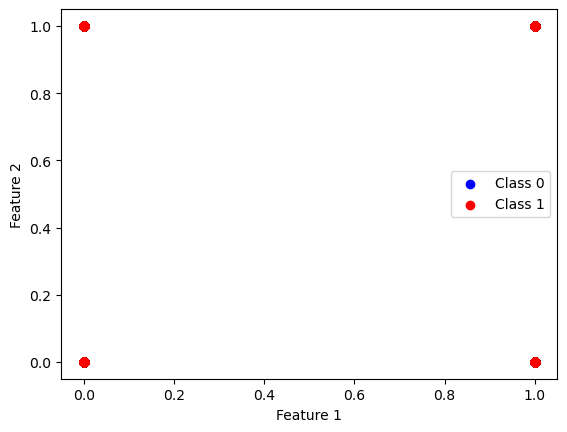

In [10]:
import matplotlib.pyplot as plt

# 예시 데이터: features는 특성, targets는 클래스 레이블
features, targets = corona_df.iloc[:, :-1], corona_df.Target

# 클래스 0과 클래스 1의 인덱스를 추출
class_0_indices = (targets == 0)
class_1_indices = (targets == 1)

# 특성을 2차원으로 축소 (예시로 두 개의 특성만 사용)
feature_1 = features.iloc[:, 2]
feature_2 = features.iloc[:, 3]

# 클래스 0과 클래스 1을 나타내는 데이터 포인트를 서로 다른 색상으로 표시
plt.scatter(feature_1[class_0_indices], feature_2[class_0_indices], c='b', label='Class 0')
plt.scatter(feature_1[class_1_indices], feature_2[class_1_indices], c='r', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.show()

In [41]:
corona_df = corona_df.astype('int16')

In [42]:
import time
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE

# GridSearchCV 수행 시작 시간 설정.
start_time = time.time()

param_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.3, 0.5, 0.7],
}

# boost_from_average가 True일 경우(default: True) 타겟 데이터가 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨
# 따라서 boost_from_average를 False로 설정하는 것이 유리하다.
lgbm = LGBMClassifier(boost_from_average=False)

features, targets = corona_df.iloc[:, :-1], corona_df.Target

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3)

# 오버 샘플링
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전:\n',pd.Series(y_train).value_counts() )
print('SMOTE 적용 후:\n',pd.Series(y_train_over).value_counts() )

# 학습 데이터를 검증 데이터로 분리
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.5)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

grid_lgbm = GridSearchCV(lgbm, param_grid, cv=3, refit=True, return_train_score=True, n_jobs=-1, error_score='raise')

grid_lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

print("GridSearchCV 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

SMOTE 적용 전:
 Target
0    182158
1     10310
Name: count, dtype: int64
SMOTE 적용 후:
 Target
0    182158
1    182158
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.615913	valid_1's binary_logloss: 0.616549
[2]	valid_0's binary_logloss: 0.570525	valid_1's binary_logloss: 0.571658
[3]	valid_0's binary_logloss: 0.542647	valid_1's binary_logloss: 0.544185
[4]	valid_0's binary_logloss: 0.52513	valid_1's binary_logloss: 0.527009
[5]	valid_0's binary_logloss: 0.513984	valid_1's binary_logloss: 0.516151
[6]	valid_0's binary_logloss: 0.506841	valid_1's binary_logloss: 0.509254
[7]	valid_0's binary_logloss: 0.502251	valid_1's binary_logloss: 0.504874
[8]	valid_0's binary_logloss: 0.499303	valid_1's binary_logloss: 0.502106
[9]	valid_0's binary_logloss: 0.497419	valid_1's binary_logloss: 0.500376
[10]	valid_0's binary_logloss: 0.496227	valid_1's binary_logloss: 0.499314
[11]	valid_0's binary_logloss: 0.495485	valid_1's binary_logloss: 0.49868
[12]	valid_0's binary_logloss: 0.495035	valid_1's binary_logloss: 0.498318
[13]	valid_0's binary_logloss: 0.494772	valid_1's binary_logloss: 0.498126
[14]	valid_0's binary_logloss: 0.494

In [43]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_lgbm.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.743489,1,0.744481,0.742924,0.743062
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.743489,1,0.744481,0.742924,0.743062
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.743489,1,0.744481,0.742924,0.743062
3,"{'learning_rate': 0.3, 'n_estimators': 1000}",0.743489,1,0.744481,0.742924,0.743062
4,"{'learning_rate': 0.5, 'n_estimators': 50}",0.743489,1,0.744481,0.742924,0.743062
5,"{'learning_rate': 0.5, 'n_estimators': 100}",0.743489,1,0.744481,0.742924,0.743062
6,"{'learning_rate': 0.5, 'n_estimators': 500}",0.743489,1,0.744481,0.742924,0.743062
7,"{'learning_rate': 0.5, 'n_estimators': 1000}",0.743489,1,0.744481,0.742924,0.743062
8,"{'learning_rate': 0.7, 'n_estimators': 50}",0.743489,1,0.744481,0.742924,0.743062
9,"{'learning_rate': 0.7, 'n_estimators': 100}",0.743489,1,0.744481,0.742924,0.743062


In [44]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test, prediction)
#     정밀도
    precision = precision_score(y_test, prediction)
#     재현율
    recall = recall_score(y_test, prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[66021 12048]
 [ 1579  2839]]
정확도: 0.8348, 정밀도: 0.1907, 재현율: 0.6426, F1:0.2941, AUC:0.7441
###########################################################################


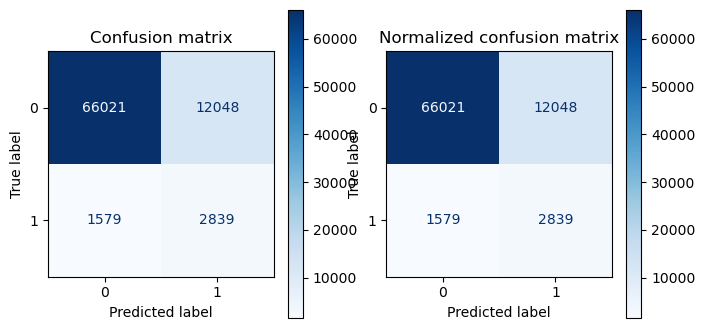

In [45]:
prediction = grid_lgbm.predict(X_test)
get_evaluation(y_test, prediction, grid_lgbm, X_test)

In [46]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(grid_lgbm, X_test, y_test, n_repeats=100, random_state=0)
corona_df.columns[importance.importances_mean.argsort()[::-1]]

Index(['Cough_symptoms', 'Fever', 'Headache', 'Sore_throat',
       'Shortness_of_breath'],
      dtype='object')

In [48]:
from sklearn.preprocessing import Binarizer

def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction, prediction_proba_class1)

In [49]:
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction_proba_class1 = grid_lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1)

# precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba_class1, pos_label="positive")
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds)

임곗값: 0.1
오차 행렬
[[    0 78069]
 [    0  4418]]
정확도: 0.0536, 정밀도: 0.0536, 재현율: 1.0000, F1:0.1017, AUC:0.5000
###########################################################################
임곗값: 0.2
오차 행렬
[[    0 78069]
 [    0  4418]]
정확도: 0.0536, 정밀도: 0.0536, 재현율: 1.0000, F1:0.1017, AUC:0.5000
###########################################################################
임곗값: 0.3
오차 행렬
[[66021 12048]
 [ 1579  2839]]
정확도: 0.8348, 정밀도: 0.1907, 재현율: 0.6426, F1:0.2941, AUC:0.7441
###########################################################################
임곗값: 0.4
오차 행렬
[[66021 12048]
 [ 1579  2839]]
정확도: 0.8348, 정밀도: 0.1907, 재현율: 0.6426, F1:0.2941, AUC:0.7441
###########################################################################
임곗값: 0.5
오차 행렬
[[66021 12048]
 [ 1579  2839]]
정확도: 0.8348, 정밀도: 0.1907, 재현율: 0.6426, F1:0.2941, AUC:0.7441
###########################################################################
임곗값: 0.6
오차 행렬
[[66021 12048]
 [ 1579  2839]]
정확도: 0.8348, 정밀도: 0.1907, 재현율: 0.6426, 

In [ ]:
오차 행렬
[[48800  3202]
 [ 1522  1417]]
정확도: 0.9140, 정밀도: 0.3068, 재현율: 0.4821, F1:0.3750, AUC:0.7636
###########################################################################

In [50]:
from sklearn.preprocessing import Binarizer
prediction = Binarizer(threshold=0.7).fit_transform(prediction_proba_class1)
get_evaluation(y_test, prediction, prediction_proba_class1)

오차 행렬
[[73078  4991]
 [ 2231  2187]]
정확도: 0.9124, 정밀도: 0.3047, 재현율: 0.4950, F1:0.3772, AUC:0.7155
###########################################################################
